# NamedHist

[Nino-hist](https://nino-hist.site) provides a customized histogram object named `NamedHist` for [boost-histogram](https://boost-histogram.readthedocs.io/en/latest). The new feature of `NamedHist` is to fill the axes with their names in the random order. Let's see how it works in [Nino-hist](https://nino-hist.site) `NamedHist`.

Supposed that you have installed [Nino-hist](https://nino-hist.site), you can created a `NamedHist` object like this. If you want to change the hist packaging path (for example, using as sub-project), you can go to the `setup.cfg` and modify `[options.packages.find]` in it.

Now, let's flip two coins.

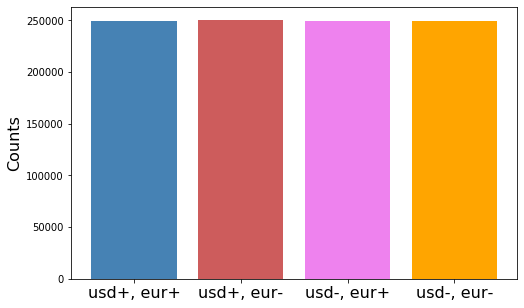

In [1]:
import hist
import numpy as np
import matplotlib.pyplot as plt

h = hist.NamedHist(
    hist.axis.Bool(name='USD', title='usd font'),
    hist.axis.Bool(name='EUR', title='eur font')
)
usd = np.random.rand(1_000_000) > 0.5
eur = np.random.rand(1_000_000) > 0.5

h.fill(USD=usd, EUR=eur)

bar = [h[0, 0], h[0, 1], h[1, 0], h[1, 1]]
x = range(len(bar))
bar_color = ['steelblue', 'indianred', 'violet', 'orange']
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(x, bar, color=bar_color)
plt.xticks(x, ("usd+, eur+", "usd+, eur-", "usd-, eur+",\
                                    "usd-, eur-"), size=16)
plt.ylabel("Counts", size=16)
fig.show()

Shown in the figure above, the four possibilities would have almost same counts when generating seeds randomly. 

`NamedHist` is simple and friendly to newers. In `NamedHist`, we do not have to follow the order of axes initialization, to remember their names is just ok. Let's see another example of `NamedHist`.

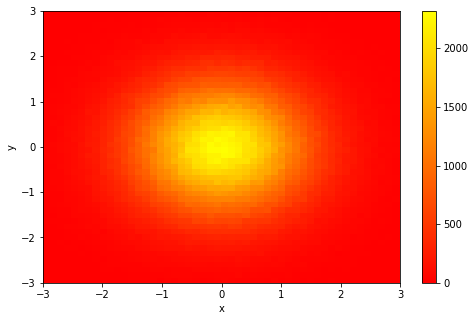

In [2]:
import boost_histogram as bh
import hist
import numpy as np
import matplotlib.pyplot as plt


h = hist.NamedHist(
    hist.axis.Regular(50, -3, 3, name="x"),
    hist.axis.Regular(50, -3, 3, name="y"),
)

x = np.random.randn(1_000_000)
y = np.random.randn(1_000_000)
h.fill(y=y, x=x)

fig, ax = plt.subplots(figsize=(8,5))
w, x, y = h.to_numpy()
mesh = ax.pcolormesh(x, y, w.T, cmap='autumn')
ax.set_xlabel('x')
ax.set_ylabel('y')
fig.colorbar(mesh)
fig.show()